# Building Trees using scikit-learn - Lab

## Introduction

Following the toy example we saw in the previous lesson, we'll now build a decision tree for a more complex dataset. This lab covers all major areas of standard machine learning practice , from data acquisition to evaluation of results. We'll continue to use the scikit-learn and pandas libraries to conduct this analysis, following the same structure we saw in the previous lesson.

## Objectives

You will be able to:

- Use pandas to prepare the data for the scikit-learn decision tree algorithm
- Train the classifier with a training dataset and evaluate performance using different measures
- Visualize the decision tree and interpret the visualization

## UCI Banknote Authentication Data Set

In this lab, we'll work with a popular dataset for classification called the "UCI Bank Note Authentication Dataset'. This Data were extracted from images that were taken from genuine and forged banknotes! The notes were first digitized, followed by a numerical transformation using DSP techniques. The final set of engineered features are all continuous in nature, meaning that our dataset consists entirely of floats, with no strings to worry about. If you're curious about how the dataset was created, you can visit the UCI link listed above to learn about feature engineering in detail!

We have following attributes in the dataset. 

1. __Variance__ of Wavelet Transformed image (continuous) 
2. __Skewness__ of Wavelet Transformed image (continuous) 
3. __Curtosis__ of Wavelet Transformed image (continuous) 
4. __Entropy__ of image (continuous) 
5. __Class__ (integer) - Target/Label 

## Step 1: Import necessary Libraries
- Import necessary libraries as we saw in previous lesson

In [5]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn import tree 
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import pandas as pd 
import numpy as np

## Your code here 

/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


## Step 2: Import Data

Now, we'll load our dataset in a DataFrame, perform some basic EDA, and generally get a feel for the data we'll be working with.

- Read the file `"data_banknote_authentication.csv"` as a pandas dataframe. Note that there is no header information in this dataset.
- Assign column names 'Variance', 'Skewness', 'Curtosis', 'Entropy', 'Class' to dataset in the given order.
- View the basic statistics and shape of dataset.
- Check for frequency of positive and negative examples in the target variable

In [6]:
# Create Dataframe
df = pd.read_csv('data_banknote_authentication.csv')
## Your code here 
df.head()

,3.6216,8.6661,-2.8073,-0.44699,0
0,4.54590,8.1674,-2.4586,-1.46210,0
1,3.86600,-2.6383,1.9242,0.10645,0
2,3.45660,9.5228,-4.0112,-3.59440,0
3,0.32924,-4.4552,4.5718,-0.98880,0
4,4.36840,9.6718,-3.9606,-3.16250,0


In [7]:
# Describe the dataset

df.describe()

,3.6216,8.6661,-2.8073,-0.44699,0
count,1371.000000,1371.000000,1371.000000,1371.000000,1371.000000
mean,0.431410,1.917434,1.400694,-1.192200,0.444931
std,2.842494,5.868359,4.310105,2.101683,0.497139
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.774700,-1.711300,-1.553350,-2.417000,0.000000
50%,0.495710,2.313400,0.616630,-0.586650,0.000000
75%,2.814650,6.813100,3.181600,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [8]:
# Shape of dataset

## Your code here 
df.shape

(1371, 5)

In [9]:
# Class frequency of target variable 

## Your code here 
df['0'].value_counts()

0    761
1    610
Name: 0, dtype: int64

## Step 3: Create Features and Labels, Training and Test Data

Now we need to create our feature set `X` and labels `y`. 
- Create `X` and `y` by selecting the appropriate columns from the dataset
- Create a 80/20 split on the dataset for training/testing. Use `random_state=10` for reproducibility

In [10]:
# Create features and labels

X = df.iloc[:, 0:-1]
y = df.iloc[:, -1:]

In [11]:
# Perform an 80/20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)


## Step 4: Train the Classifier and Make Predictions
- Create an instance of decision tree classifier with random_state=10 for reproducibility
- Fit the training data to the model 
- USe the trained model to make predictions with test data

In [12]:
# Train a DT classifier

DT = DecisionTreeClassifier(random_state=10)
model = DT.fit(X_train, y_train)

In [13]:
# Make predictions for test data

y_hat = model.predict(X_test)

## Step 5: Check Predictive Performance

We can now use different evaluation measures to check the predictive performance of the classifier. 
- Check the accuracy , AUC and create a confusion matrix 
- Interpret the results 

Accuracy:  0.9854545454545455

AUC is :0.99


Text(91.68, 0.5, 'predicted label')

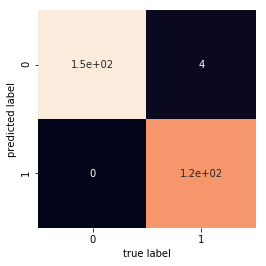

In [14]:
# Calculate Accuracy , AUC and Confusion matrix 
print("Accuracy: ", accuracy_score(y_test, y_hat))

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_hat)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("\nAUC is :{0}".format(round(roc_auc,2)))

# print('\nConfusion Matrix')
# print('----------------')
# pd.crosstab(y_test, y_hat, rownames=['True'], colnames=['Predicted'], margins=True)

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
cm = confusion_matrix(y_test, y_hat)
sns.heatmap(cm, square=True, annot=True, cbar=False, xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel("true label")
plt.ylabel("predicted label")

## Bonus: Re-grow the Tree Using Entropy 

SO in the above example, we used all default settings for decision tree classifier. The default impurity criterion in scikit-learn is the Gini impurity. We can change it back to entropy by passing in `criterion='entropy'` argument to the classifier in the training phase. 
- Repeat the above tasks for training, evaluation and visualization using Entropy measure. (
- Compare and interpret the results 

In [15]:


## Your code here 

DT_entropy = DecisionTreeClassifier(criterion='entropy', random_state=10)
model_entropy = DT_entropy.fit(X_train, y_train)

In [16]:
y_hat_e = model_entropy.predict(X_test)

Accuracy:  0.9854545454545455

AUC is :0.99


Text(91.68, 0.5, 'predicted label')

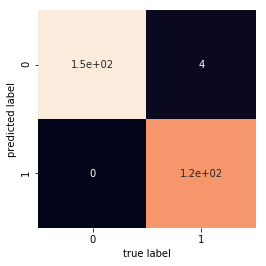

In [17]:
# Calculate Accuracy , AUC and Confusion matrix 
print("Accuracy: ", accuracy_score(y_test, y_hat_e))

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_hat_e)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("\nAUC is :{0}".format(round(roc_auc,2)))

# print('\nConfusion Matrix')
# print('----------------')
# pd.crosstab(y_test, y_hat, rownames=['True'], colnames=['Predicted'], margins=True)

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
cm = confusion_matrix(y_test, y_hat_e)
sns.heatmap(cm, square=True, annot=True, cbar=False, xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel("true label")
plt.ylabel("predicted label")

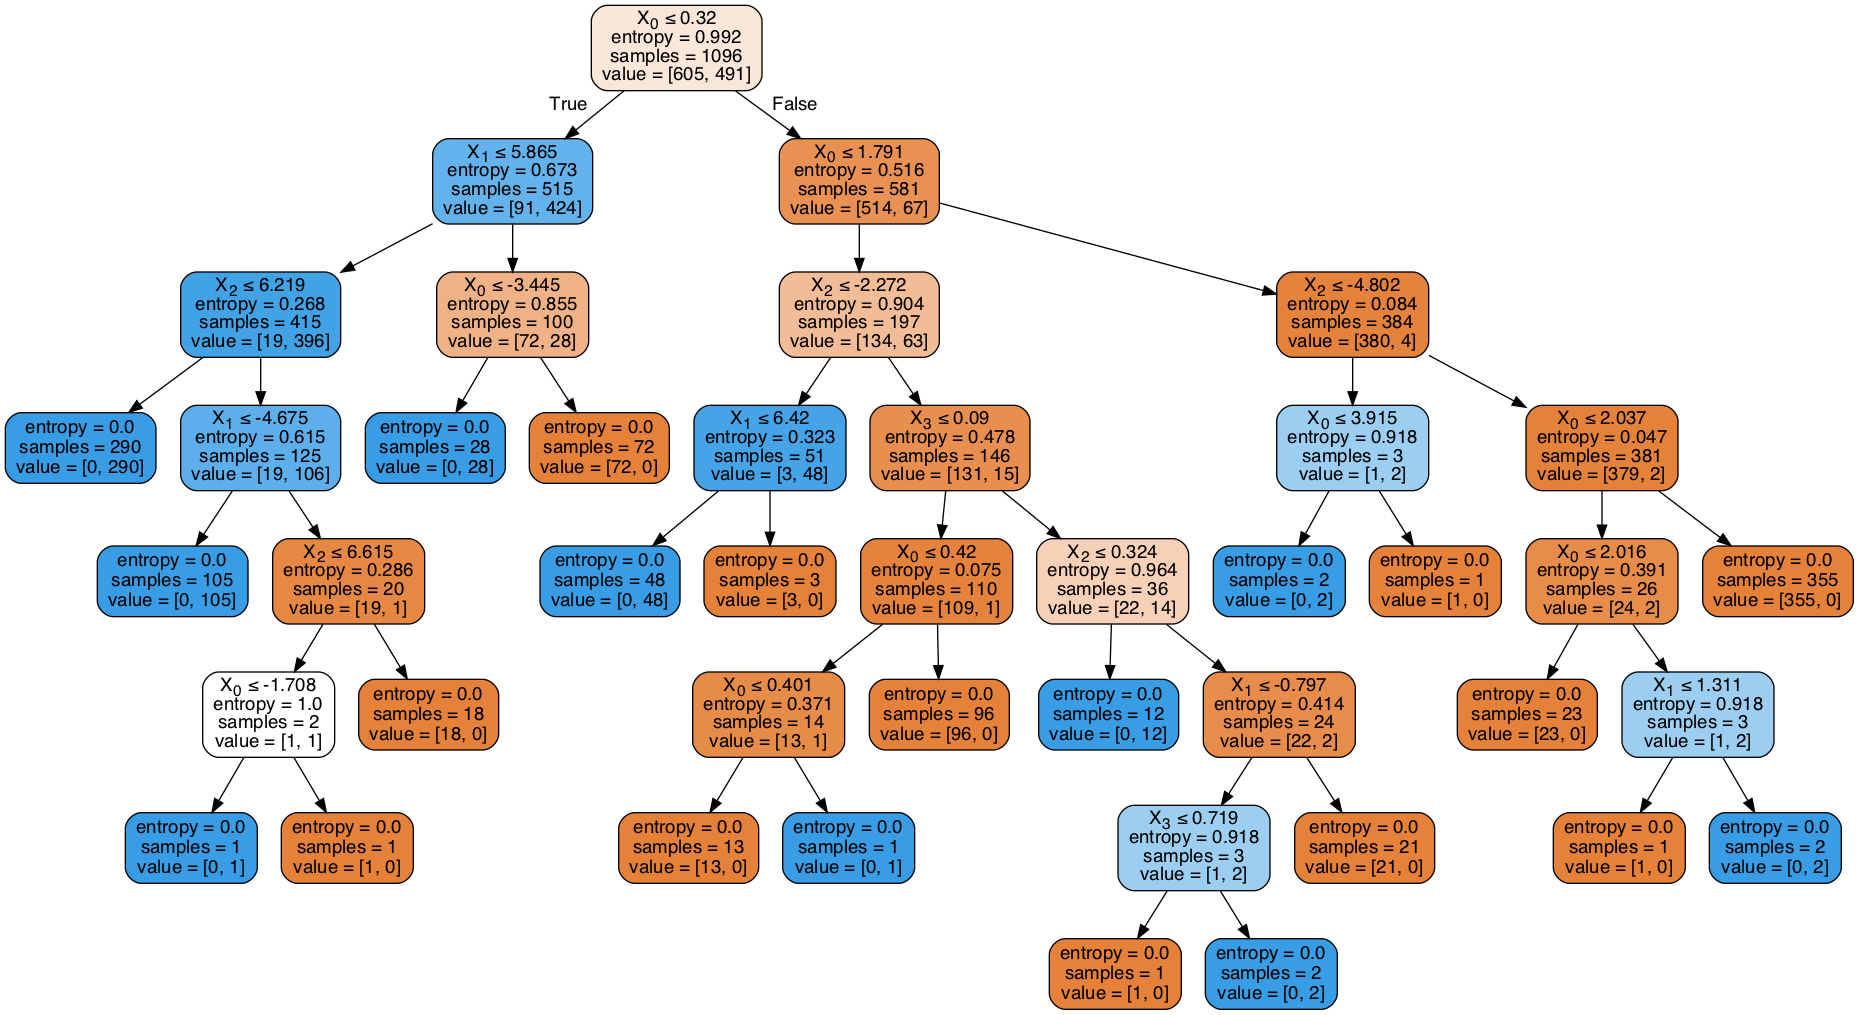

In [18]:
dot_data = StringIO()
export_graphviz(model_entropy, out_file=dot_data, filled=True, rounded=True,special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

## Level up - Optional 

- We discussed earlier that decision trees are very sensitive towards outliers. Try to identify and remove/fix any possible outliers in the dataset. 
- Check the distributions of the data. Is there any room for normalization/scaling of data ? Apply these techniques and see if it improves upon accuracy score. 

## Summary 

In this lesson, we looked at growing a decision tree for banknote authentication dataset which is composed of extracted continuous features from photographic data. We looked at different stages of the experiment including data acquisition, training, prediction and evaluation. We also looked at growing trees using entropy vs. gini impurity criteria. In following lessons, we shall look at some more such pre-train tuning techniques for ensuring an optimal classifier for learning and prediction.  